<a href="https://colab.research.google.com/github/Raph-09/News-Authenticity-Classification-Using-The-Source/blob/main/Fake_News_Classification_Using_The_Source(Interview_Assessment).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**NEWS AUTHENTICITY DETECTION USING SOURCE OF NEWS ARTICLES** 

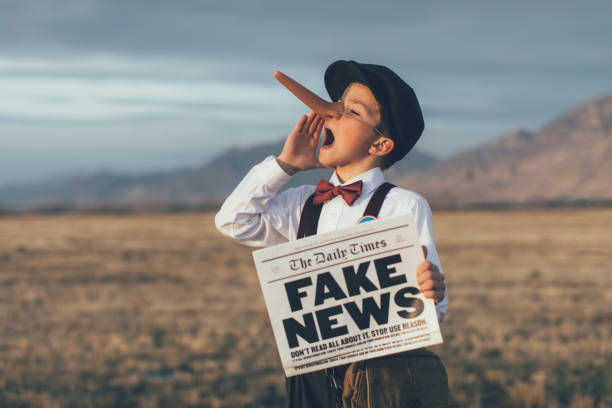

## **UNDERSTANDING THE PROBLEM**
The internet has made information more accessible than ever before, but with this convenience comes the challenge of distinguishing fact from fiction. Misinformation is rampant on the web, and it is being spread by a variety of actors, including individuals seeking personal gain, companies, politicians, and even some news media outlets. These entities propagate false information in order to sway public opinion and shape events to fit their own biases and prejudices. The manual evaluation of news for authenticity is a tedious and time-consuming process, and it is also subject to subjective bias. This makes it extremely difficult to accurately gauge the credibility of information found online.

## **SOLUTION TO THE PROBLEM**
Machine learning is used to automatically predict the authenticity of news articles. It predicts if the news article is false or authentic. This approach is adopted because the traditional method of sifting through news articles is tedious and increasingly impossible. With the growing number of websites and news articles generated daily, traditional tools are unable to quickly detect misleading information


## **AIM OF THE PROJECT**


The aim of this project is to use the source of news article to predict it's authenticity. The article text will be combined with the name of the site generating the fake news to predict it's genuineness.

## **METHODOLOGY OR STEPS IN PROJECT IMPLEMENTATION**

1. Import Needed Libraries

2. Reading the news articles dataset

3. Basic Information about the dataset and missing data handling

4. Exploratory Data Analysis

5. Text Preprocessing 

  5.1 Combining Features

  5.2 Remove Punctuation

  5.3 Tokenization

  5.4 Stemming

  5.5 Feature Encoding

  5.6 Data Segregation or splitting

  5.7 Convert text to string

  5.8 Vectorization using TFIDF

6. Training machine learning models
  
  6.1 Adaboost Machine Learning Algorithm

  6.2 Support Vector Machine Classifier

  6.3 Passive Aggressive Classifier






Please install swifter before running the notebook: pip install swifter 

## 1. Import and Install Needed Libraries

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.util import ngrams
import string
from collections import Counter, defaultdict
from nltk import FreqDist
import re
import swifter 
import warnings
with warnings.catch_warnings():
  warnings.simplefilter('ignore')
import nltk
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

##2. Reading the news articles dataset

In [59]:
train_df = pd.read_csv('/content/drive/MyDrive/Assessment Datasets/Interview_case_study/Train data.csv')
test_df =  pd.read_csv('/content/drive/MyDrive/Assessment Datasets/Interview_case_study/Train data.csv')

## 3. Basic Information about the dataset and Missing data handling

###  3.1 Display first 5 rows

This is done to get an overview of the structure of the data, including the number of columns, the names of the columns, and the values in each column.

In [11]:
train_df.head()

,author,published,title,text,language,site_url,main_img_url,type,title_without_stopwords,text_without_stopwords,hasImage,label
0,Barracuda Brigade,2016-10-26T21:41:00.000+03:00,muslims busted they stole millions in govt ben...,print they should pay all the back all the mon...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,bias,muslims busted stole millions govt benefits,print pay back money plus interest entire fami...,1.0,Real
1,reasoning with facts,2016-10-29T08:47:11.259+03:00,re why did attorney general loretta lynch plea...,why did attorney general loretta lynch plead t...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,bias,attorney general loretta lynch plead fifth,attorney general loretta lynch plead fifth bar...,1.0,Real
2,Barracuda Brigade,2016-10-31T01:41:49.479+02:00,breaking weiner cooperating with fbi on hillar...,red state \nfox news sunday reported this mor...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,bias,breaking weiner cooperating fbi hillary email ...,red state fox news sunday reported morning ant...,1.0,Real
3,Fed Up,2016-11-01T05:22:00.000+02:00,pin drop speech by father of daughter kidnappe...,email kayla mueller was a prisoner and torture...,english,100percentfedup.com,http://100percentfedup.com/wp-content/uploads/...,bias,pin drop speech father daughter kidnapped kill...,email kayla mueller prisoner tortured isis cha...,1.0,Real
4,Fed Up,2016-11-01T21:56:00.000+02:00,fantastic trumps point plan to reform healthc...,email healthcare reform to make america great ...,english,100percentfedup.com,http://100percentfedup.com/wp-content/uploads/...,bias,fantastic trumps point plan reform healthcare ...,email healthcare reform make america great sin...,1.0,Real


### 3.2  Display bottom 5 rows

In [12]:
train_df.tail()

,author,published,title,text,language,site_url,main_img_url,type,title_without_stopwords,text_without_stopwords,hasImage,label
1595,No Author,2016-10-28T03:13:46.387+03:00,iraqi forces score major gains south of mosul,on today at pm duterte wants foreign troops ...,english,presstv.ir,http://media.presstv.com/photo/20161027/d3bfdb...,state,trump vps plane slides runway new york airport,reply today pm part mother child worship https...,1.0,Real
1596,No Author,2016-10-28T03:13:47.181+03:00,us supreme court justice groped female lawyer ...,reply on july pm russia eu prolongs econo...,english,presstv.ir,http://media.presstv.com/photo/20161028/54a83d...,state,presstvrussia cancels request fuel ships spain,today pm solar winds spur geomagnetic storm ma...,1.0,Real
1597,No Author,2016-10-28T03:45:23.031+03:00,trump vps plane slides off runway at new york ...,reply on today at pm part mother child wo...,english,presstv.ir,http://media.presstv.com/photo/20161026/ef2031...,state,study swift birds fly nonstop months every year,today pm aig quadruples limits terrorism insur...,1.0,Real
1598,No Author,2016-10-26T08:00:00.000+03:00,presstvrussia cancels request to fuel ships in...,on today at pm solar winds spur geomagnetic ...,english,presstv.ir,http://media.presstv.com/photo/20161028/b440d4...,state,yemeni forces fire ballistic missile saudi ara...,windows reply november pm nvidia even admitted...,1.0,Real
1599,No Author,2016-10-28T04:21:55.986+03:00,study swift birds fly nonstop for months ever...,on today at pm aig quadruples limits for ter...,english,presstv.ir,http://media.presstv.com/photo/20161028/f25eb3...,state,fastest electric commuter ferry unveiled sweden,logged answer one people fictional entity crea...,1.0,Real


### 3.3 Check the number of rows and columns present in the dataset

The dataset has 1597 rows and 16 columns.

In [13]:
train_df.shape

(1600, 12)

### 3.4 Get a generic summary of the dataset

All the columns are of the object type, except for "hasimage," which is of the float type. There are null values present in some of the columns.

In [14]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600 entries, 0 to 1599
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   author                   1599 non-null   object 
 1   published                1600 non-null   object 
 2   title                    1600 non-null   object 
 3   text                     1600 non-null   object 
 4   language                 1599 non-null   object 
 5   site_url                 1599 non-null   object 
 6   main_img_url             1599 non-null   object 
 7   type                     1599 non-null   object 
 8   title_without_stopwords  1597 non-null   object 
 9   text_without_stopwords   1598 non-null   object 
 10  hasImage                 1598 non-null   float64
 11  label                    1599 non-null   object 
dtypes: float64(1), object(11)
memory usage: 150.1+ KB


### 3.5 Inspect for null values

A null value is the absence of a value or data. In NLP, null values can pose a challenge as they can lead to errors or unexpected results during processing and analysis of the data. 

In [15]:
train_df.isnull().sum()

author                     1
published                  0
title                      0
text                       0
language                   1
site_url                   1
main_img_url               1
type                       1
title_without_stopwords    3
text_without_stopwords     2
hasImage                   2
label                      1
dtype: int64

### 3.6 Get all categorical features






In [112]:
c_vars = [vr for vr in train_df.columns if train_df[vr].dtypes=='O']
c_vars

['author',
 'published',
 'title',
 'text',
 'language',
 'site_url',
 'main_img_url',
 'type',
 'title_without_stopwords',
 'text_without_stopwords',
 'label']

In [ ]:
c_vars = [vr for vr in train_df.columns if train_df[vr].dtypes=='O'and vr in ['author','type','language','label']]
c_vars

### 3.7 Get all Numerical feature

In [17]:
n_vars = [vr for vr in train_df.columns if train_df[vr].dtypes!="O"]
n_vars

['hasImage']

### 3.8 Get unique values in categorical features

In [18]:
def unique_cat(df,vr):
        return df[vr].unique()

for vr in c_vars:
    print(vr)
    print(unique_cat(train_df,vr))

author
['Barracuda Brigade' 'reasoning with facts' 'Fed Up' 'EdJenner'
 'No Author' 'Shawn Helton' 'Mike Rivero' 'Branko Mali' 'Jimmy Rustling'
 'tokyowashi (noreply@blogger.com)' 'Anonymous' 'pak alresky'
 'Steve smith' 'David Howard' 'Joseph Olson' 'neoholographic' 'Peeple'
 'PraetorianAZ' 'seentoomuch' 'vlawde' 'apoc36' 'theantediluvian' 'reldra'
 'Kali74' 'recrisp' 'Profusion' 'sanitizedinfo' 'The angel of light'
 'darkbake' 'willz' 'jedi_hamster' 'PrairieShepherd' 'SyxPak' 'matafuchs'
 'Bloodydagger' 'Xcathdra' 'gortex' 'ssenerawa' 'Encryptor' 'bryan2006'
 'ghostrager' 'frenchfries' 'Paradoxroutine' 'SoulOfCeres' 'gariac'
 'xuenchen' 'Hefficide' 'childoffather' 'Gandalf77' 'Kantzveldt' 'greg302'
 'WindCharger' 'crazyewok' 'TrueBrit' 'beeeyotch' 'Zaphod58'
 'CriticalStinker' 'Violater1' 'carewemust' 'DaRAGE' 'mobiusmale'
 'Brandon Turbeville' 'Activist Post' 'ActivistPost'
 'Day of the Dead 2015: History, food and reflections \x96 Andrea Lawson Gray'
 'Ivan Jose' 'Tony Rabon' 'Shir

**Language(Unique values)**

1. English

2. Hate
  
3. nan

4. Ignore

5. German

6. French


The terms "nan" and "ignore" indicate the presence of null values and ambiguous categories. These issues will be addressed.


 **Article Types (Unique values)**

1. bias

2. conspiracy

3. fake

4. bs

5. satire

6. hate

**Label (Unique Values)**

1. Real

2. Fake

3. nan

4. 1


Checking for unique values confirmed the presence of null and inconsistent values


### 3.9  Handling missing data

The missing values in the dataset are handled as follows:

1. Null values in the "type" column are replaced using the mode ("bs") because they are missing completely at random and deletion is also an option.

2. Null values in the author column are replaced with "Unknown" due to the 3.possibility of anonymous writers, especially for fake news.

3. Null values in the target column (label) are replaced with "Fake" as the data collector may have accidentally left a space instead of "Fake."

4. The remaining missing values are deleted from the table.





In [19]:
train_df['type'].mode()

0    bs
dtype: object

In [66]:
train_df.author = train_df.author.replace({None : 'No Author'})
test_df.author = test_df.author.replace({None : 'No Author'})

train_df.label = train_df.label.replace({None : 'Fake'})
train_df['type'] = train_df['type'].fillna('bs')

test_df['type'] = test_df['type'].fillna('bs')

In [76]:
train_df = train_df.dropna()
test_df = test_df.dropna()

## 3.10 Dealing with Illogical data


Values such as '1' or 'ignore' present in label and language columns are replaced with 'Real' and 'Unknown' respectively.

In [74]:
train_df.label = train_df.label.replace({'1':'Real'})
train_df.language = train_df.language.replace({'ignore':'Unknown'})

In [75]:
test_df.language = test_df.language.replace({'ignore':'Unknown'})

### Confirming the removal of null values

In [77]:
train_df.isnull().sum()

author                     0
published                  0
title                      0
text                       0
language                   0
site_url                   0
main_img_url               0
type                       0
title_without_stopwords    0
text_without_stopwords     0
hasImage                   0
label                      0
dtype: int64

## 4. Exploratory Data Analysis ( Insights gathering)

### Here, I will explore the data by asking the following questions:

4.1 What is the distribution of the target variable?

4.2 Which language is the most used?

4.3 What are the top 10 most common words in the news articles?

4.4 What are the top 10 least used words?

4.5 What are the different types of news articles?

4.6 Does number of images determine the authenticity of news articles?

4.7 Which sites post the most fake news?

4.8 What are the names of sites that post least fake news articles?

4.9 Which sites post both fake news and real news?

4.10 Sites that post genuine news

4.11 Who are the authors that post fake news?

4.12 Who are the authors that post authentic news?

4.13 List of Authors that post both fake and authentic news

4.14 Identify comments in the article dataset

4.15 What are the news article length?

4.16 What role does Vocabulary play in understanding the authenticity of news article?

4.17 How can POS be used to understand news articles?

4.18 How does time of publication influence news article?

### 4.1 What is the distribution of the target variable?

OR Checking for imbalance of categorical features

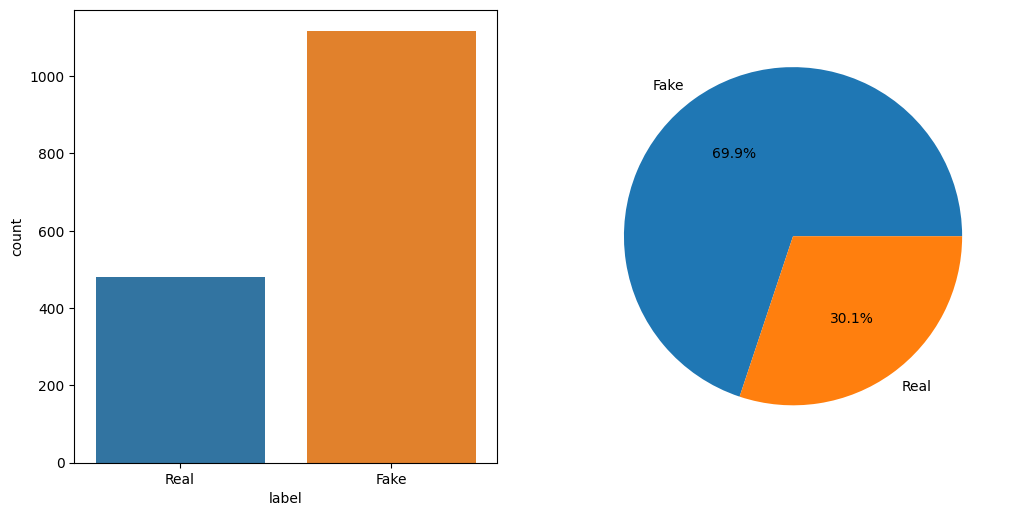

In [24]:
# Displaying target distribution.
fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(12, 6), dpi=100)
sns.countplot(x=train_df['label'], ax=axes[0])
axes[1].pie(train_df['label'].value_counts(),labels=['Fake', 'Real'],autopct='%1.1f%%')
plt.show()

Real news articles account for a mere 30% of the data, while fake news articles dominate with a staggering 70%. This presents a classic case of an imbalanced target variable, but fear not! The problem will be expertly tackled through the use of upsampling techniques.

### 4.2 Which language is the most used?

In [25]:
fig =px.pie(train_df,names='language',title='Languages Of News Articles')
fig.show()

The dorminant langauge is english, followed by German

### 4.3 What are the  most common words in the news articles?

The most common words will be analyzed using

1. Unigram language model

2. Bigram language model

3. Trigram language model

Unigram: A unigram is the simplest type of language model and is used to analyze the frequency of individual words in a given text. It considers each word as a standalone unit and doesn't take into account the relationship between the words. For example, in the sentence "The cat chased the mouse," each word "The", "cat", "chased", "the", and "mouse" would be considered as separate unigrams.

Bigram: Bigram language model takes into account the relationship between two adjacent words. In other words, bigrams consider pairs of words in a text. For example, in the sentence "The cat chased the mouse," the bigrams would be "The cat", "cat chased", "chased the", and "the mouse". Bigrams are useful in understanding the co-occurrence of words in a text and can be used to predict the next word based on the previous one.

Trigram: Trigrams are similar to bigrams, but they take into account the relationship between three adjacent words. In other words, trigrams consider sequences of three words in a text. For example, in the sentence "The cat chased the mouse," the trigrams would be "The cat chased", "cat chased the", and "chased the mouse". Trigrams are useful in predicting the next two words based on the previous two words.

Note: Unigram, bigram, and trigram models can be extended to higher orders, such as 4-grams, 5-grams, etc.




4.3.1 MOST COMMON WORD IN A UNIGRAM MODEL

In [26]:
def get_ngrams(text, n=2):
    text = str(text)
    n_grams = ngrams(text.split(), n)
    returnVal = []
    
    try:
        for grams in n_grams:
            returnVal.append('_'.join(grams))
    except(RuntimeError):
        pass
        
    return ' '.join(returnVal).strip()
article_string_list = train_df['text_without_stopwords'].tolist()
article_string = ' '.join(article_string_list)

In [27]:
wordcloud = WordCloud(width = 2000, height = 1334, random_state=1, background_color='black', colormap='Pastel1', max_words = 100, collocations=False, normalize_plurals=False).generate(article_string)

In [28]:
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    fig = plt.figure(figsize=(25, 10), dpi=80)
    plt.tight_layout(pad=0)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.box(False)
    plt.show()
    plt.close() 


### Unigram Word Cloud to visualize the most frequent word

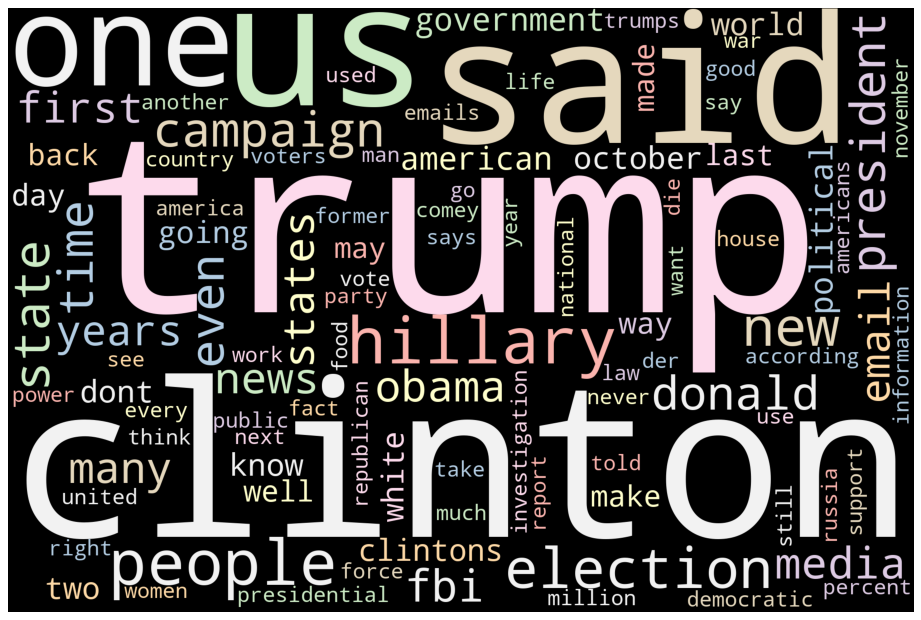

In [29]:
plot_cloud(wordcloud) 

The most frequent words are "Trump", "Clinton", "elections", "people", "Clintons", "one us", and "Obama". This is probably because the data was gathered during the US presidential elections, as these words are the names of US presidential candidates.

### Using Pandas table to display the most common unigram words

In [25]:
Unigrams = {}
words = article_string.split()
for i in range(len(words)-1):
    if (words[i], words[i+1]) in Unigrams:
        Unigrams[(words[i], words[i+1])] += 1
    else:
        Unigrams[(words[i], words[i+1])] = 1

sorted_uigrams = sorted(Unigrams.items(), key=lambda x: x[1], reverse=True)

df = pd.DataFrame(sorted_uigrams, columns=['Unigram', 'Frequency'])
df = df.head(20)

df

,Unigram,Frequency
0,"(hillary, clinton)",887
1,"(donald, trump)",671
2,"(united, states)",368
3,"(new, york)",263
4,"(brain, force)",209
5,"(white, house)",208
6,"(clinton, campaign)",192
7,"(hillary, clintons)",181
8,"(clinton, foundation)",165
9,"(bill, clinton)",161


### 4.3.2 Most Common Words Using BI-Gram Model

Pandas Apply:   0%|          | 0/1597 [00:00<?, ?it/s]

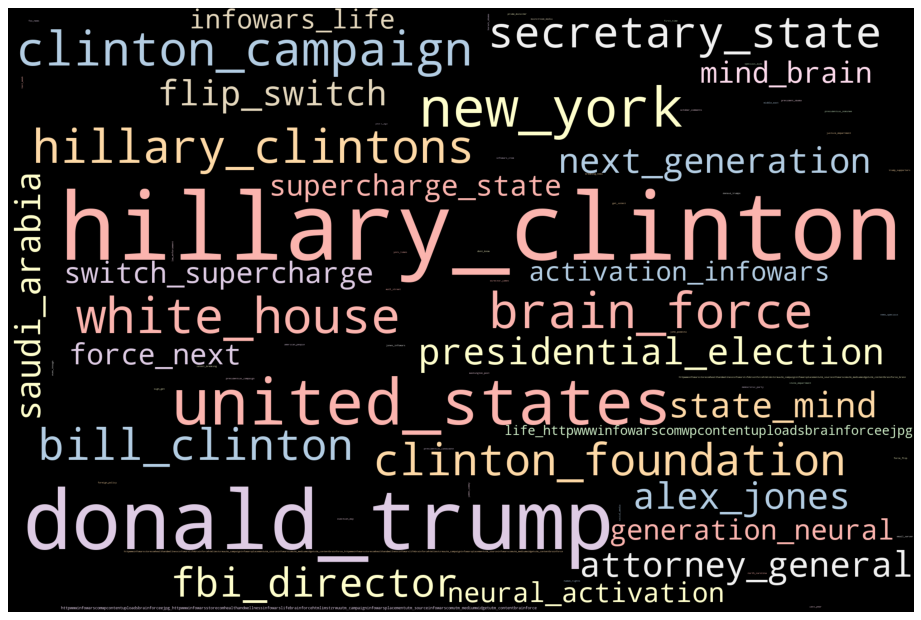

In [26]:
train_df["bigram_text"] = train_df["text_without_stopwords"].swifter.apply(get_ngrams, n=2)
bigram_tweet_string_list = train_df['bigram_text'].tolist()
bigram_tweet_string = ' '.join(bigram_tweet_string_list)
bigram_wordcloud = WordCloud(width = 2000, height = 1334, random_state=1, background_color='black', colormap='Pastel1', max_words = 75, collocations=False, normalize_plurals=False).generate(bigram_tweet_string)
plot_cloud(bigram_wordcloud)  

Similar to the unigram model the common words are hillary_clinton, donald_trump,white_house, united_states. This confirms the earlier suspicion that the data was gathered during Us genral elections.

Most Common Words Using a trigram model

Pandas Apply:   0%|          | 0/1597 [00:00<?, ?it/s]

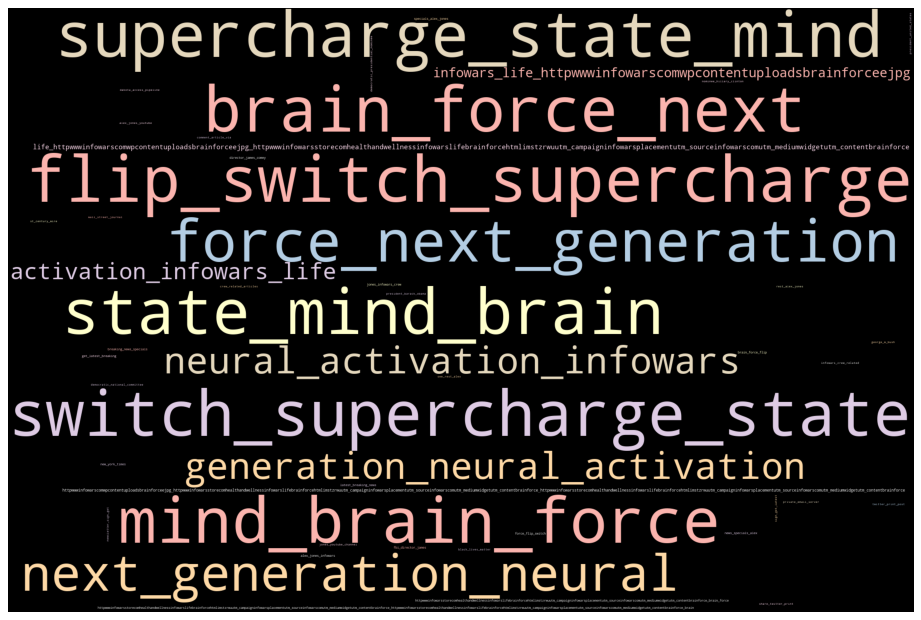

In [27]:
train_df["trigram_text"] = train_df["text_without_stopwords"].swifter.apply(get_ngrams, n=3)
trigram_tweet_string_list = train_df['trigram_text'].tolist()
trigram_tweet_string = ' '.join(trigram_tweet_string_list)
trigram_wordcloud = WordCloud(width = 2000, height = 1334, random_state=1, background_color='black', colormap='Pastel1', max_words = 50, collocations=False, normalize_plurals=False).generate(trigram_tweet_string)
plot_cloud(trigram_wordcloud)  

This is a bit different from the result of the unigram and bigram models.

### 3.4 What are the top 10 least used words?

In [28]:
# let's see the 10 most words used in title:
freq1 = nltk.FreqDist(' '.join(train_df['text_without_stopwords']).split())
last_ten = FreqDist(dict(freq1.most_common()[-10:]))
last_ten

FreqDist({'windowsaccording': 1, 'threethe': 1, 'nvidianvidia': 1, 'screensso': 1, 'functionality': 1, 'arrangementthere': 1, 'acrimony': 1, 'graphics': 1, 'yetwhile': 1, 'sbut': 1})

The least used words are:

1. windowsaccording

2. Threethe

3. nvidianvidia

4. screensso

5. functionality

6. arrangementthre

7. acrimony

8. graphics

9. yetwhile



### 3.5 What are the different types of news articles?

In [29]:
fig = px.pie(train_df,names='type',title='Types of News Articles')
fig.show()

Majority of the news articles are 'bs' type, while the least article type is 'fake'

### 3.6 Does number of images determine the authenticity of news articles?

In [30]:
fig = px.bar(train_df, x='hasImage', y='label',title='Articles Including Images and Authenticity of News Articles')
fig.show()

Fake news has the highest number of articles with images compared to real news, but this may be because there are more fake news articles than real news articles

### 3.7 Which sites post the most fake news?

In [31]:
train_df[train_df['label'] == 'Fake']['site_url'].value_counts().head(10)

infowars.com          100
activistpost.com      100
naturalnews.com       100
awdnews.com           100
clickhole.com         100
abeldanger.net         82
der-postillon.com      72
ahtribune.com          67
abovetopsecret.com     53
legorafi.fr            46
Name: site_url, dtype: int64

The websites Infowars.com, Activistpost.com, Naturalnews.com, Awdnews.com, and Clickhole.com are known to post the most fake news, with 100 fake news posts each according to this dataset

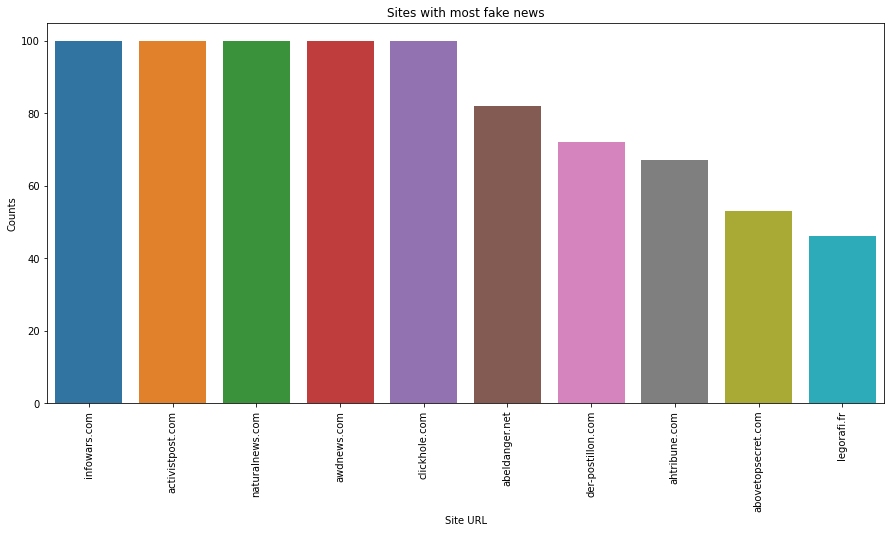

In [32]:
# Plotting bar chart
plt.figure(figsize=(15,7))
sns.barplot(x=train_df[train_df['label'] == 'Fake']['site_url'].value_counts().head(10).index,
            y=train_df[train_df['label'] == 'Fake']['site_url'].value_counts().head(10).values)

# Adding labels and title
plt.xlabel("Site URL")
plt.ylabel("Counts")
plt.title("Sites with most fake news")

# Rotating x-axis labels by 45 degrees
plt.xticks(rotation=90)

# Show plot
plt.show()


### 3.8 What are the names of sites that post least fake news articles?

In [33]:
train_df[train_df['label'] == 'Fake']['site_url'].value_counts().tail(10)

abcnews.com.co           2
americannews.com         2
intrepidreport.com       1
allnewspipeline.com      1
madworldnews.com         1
davidduke.com            1
globalresearch.ca        1
barenakedislam.com       1
defenddemocracy.press    1
frontpagemag.com         1
Name: site_url, dtype: int64

These are sites with least fake news

### 3.9 Which sites post both fake news and real news?

In [34]:
real = set(train_df[train_df['label'] == 'Real']['site_url'].unique())
fake = set(train_df[train_df['label'] == 'Fake']['site_url'].unique())
print(f"Websites publishing both real & fake news are:{real & fake}")

Websites publishing both real & fake news are:{'newstarget.com', 'fromthetrenchesworldreport.com', 'frontpagemag.com', 'davidduke.com'}


Sites that post both fake and real news

1. fromthetrenchesworldreport.com

2. newstarget.com

3. davidduke.com

4. frontpagemag.com



### 3.10 Sites that post genuine news

In [35]:
train_df[train_df['label'] == 'Real']['site_url'].value_counts().head(10)

politicususa.com                  100
frontpagemag.com                   99
presstv.ir                         82
dailywire.com                      81
davidduke.com                      43
100percentfedup.com                33
presstv.com                        21
addictinginfo.org                  20
fromthetrenchesworldreport.com      1
newstarget.com                      1
Name: site_url, dtype: int64

These are sites that post geniune news. Politicususa.com is the site that post the most authentic news.

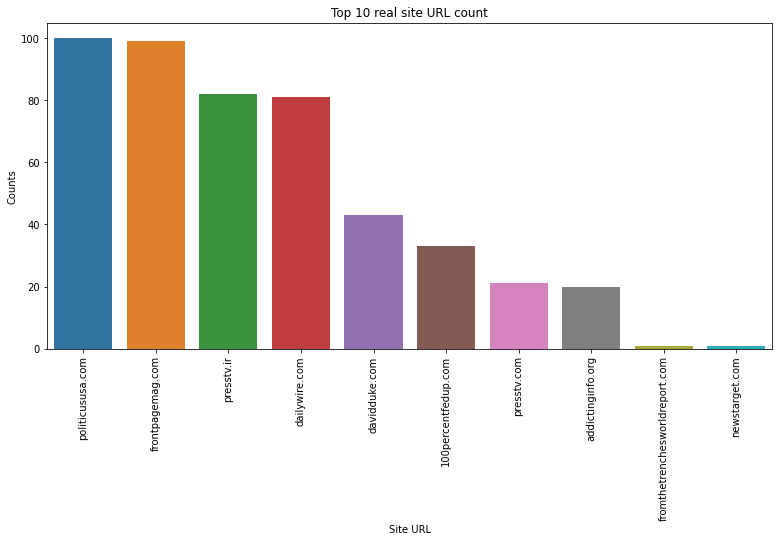

In [36]:
# Plotting bar chart
plt.figure(figsize=(13,6))
sns.barplot(x=train_df[train_df['label'] == 'Real']['site_url'].value_counts().head(10).index,
            y=train_df[train_df['label'] == 'Real']['site_url'].value_counts().head(10).values)

# Adding labels and title
plt.xlabel("Site URL")
plt.ylabel("Counts")
plt.title("Top 10 real site URL count")

# Rotating x-axis labels by 45 degrees
plt.xticks(rotation=90)

# Show plot
plt.show()


### 3.11 Who are the authors that post fake news?

In [37]:
Fake_news_authors = set(list(train_df[train_df['label']=='Fake']['author'].unique()))
df_f = pd.DataFrame({"Authors": list(Fake_news_authors)})
df_f.head(6)


,Authors
0,Gandalf77
1,B. J. Sabri
2,Daniel Greenfield
3,Nili Nathan
4,Ike Mclean
5,Jonathan Brooks


These are the authors that post the most fake news.

### 3.12  Who are the authors that post authentic news?


In [ ]:
Au_news_authors = set(list(train_df[train_df['label']=='Real']['author'].unique()))
df = pd.DataFrame({"Authors": list(Au_news_authors)})
df.head(6)

,Authors
0,Humberto Fontova
1,Rmuse
2,Mike Rivero
3,Sarah Jones
4,Lloyd Billingsley
5,Thomas Sowell


These are authors that post the most real news

### 3.13 List of Authors that post both fake and authentic news

In [ ]:
f_A = df.merge(df_f)
# Printing the common rows
f_A.head(5)

,Authors
0,Mike Rivero
1,Angel - NYC
2,Don Wrightman
3,No Author
4,Dr. Patrick Slattery


These are authors that post both fake and real news

### 3.15 What are the news article length?

In [ ]:
train_df['text_without_stopwords_str'] = train_df['text_without_stopwords'].str.strip()
train_df['text_length'] = train_df['text_without_stopwords'].apply(lambda x: len(x))
train_df[['text','text_length']].head()

,text,text_length
0,print they should pay all the back all the mon...,324
1,why did attorney general loretta lynch plead t...,1284
2,red state \nfox news sunday reported this mor...,954
3,email kayla mueller was a prisoner and torture...,196
4,email healthcare reform to make america great ...,1526


The 'text_length' gives the length of each of the article


### 3.14 Identify comments in the article dataset

In [ ]:
train_df[train_df['text_length']<=15]['text']

84         brilliant
92         brilliant
97         brilliant
103        brilliant
104        brilliant
331    great article
362    racist drivel
Name: text, dtype: object

These comments are present in the dataset, but they will remain as it would be challenging to remove them

### 3.17 How can POS be used to understand news articles?


POS (Parts of Speech) tagging is the process of marking each word in a text corpus with its corresponding grammatical category, such as noun, verb, adjective, adverb, etc. It is a key step in NLP (Natural Language Processing) pipelines for parsing, sentiment analysis, and more.

POS tagging is used to understand the role of each word in a sentence. The process of POS tagging involves identifying the words in a sentence and then classifying them based on the type of words they are, such as nouns, verbs, adjectives, adverbs, etc. These tags provide information about the grammatical relationships between words and help in parsing the sentence structure.

The Natural Language Toolkit (NLTK) library in Python uses the following symbols for POS tagging:

1. CC: coordinating conjunction
2. CD: cardinal digit
3. DT: determiner
4. EX: existential there (like: "there is" ... think of it like "there exists")
5. NN: noun, singular or mass
6. NNS: noun, plural
7. RBR: adverb, comparative
8. VB: verb, base form ETC


In [ ]:
all_tokenized_gen = [a for b in train_df[train_df['label']=='Fake']['text_without_stopwords'].tolist() for a in b]
all_tokenized_fake = [a for b in train_df[train_df['label']=='Real']['text_without_stopwords'].tolist() for a in b]

In [ ]:
def get_post_tags_list(tokenized_articles):
    all_pos_tags = []
    for word in tokenized_articles:
        pos_tag = nltk.pos_tag([word])[0][1]
        all_pos_tags.append(pos_tag)
    return all_pos_tags

In [ ]:
all_pos_tagged_word_gen = get_post_tags_list(all_tokenized_gen)
all_pos_tagged_word_fake = get_post_tags_list(all_tokenized_fake)

In [ ]:
all_pos_tagged_word_gen[:5], all_pos_tagged_word_fake[:5]

(['NN', 'NN', 'NN', 'NNS', 'NN'], ['NN', 'NN', 'NN', 'NN', 'NN'])

In [ ]:
gen_pos_df = pd.DataFrame(dict(Counter(all_pos_tagged_word_gen)).items(), columns=['Pos_tag', 'Genuine News'])
fake_pos_df = pd.DataFrame(dict(Counter(all_pos_tagged_word_fake)).items(), columns=['Pos_tag', 'Fake News'])

In [ ]:
gen_pos_df.head(10)

,Pos_tag,Genuine News
0,NN,1996464
1,NNS,82987
2,DT,151335
3,.,11
4,CD,2


In [ ]:
fake_pos_df.head()

,Pos_tag,Fake News
0,NN,785552
1,DT,62615
2,NNS,31306


Fake News Articles and Real News Articles have similas POS tag distributions

### 3.18 How does time of publication influence news article?

In [ ]:
train_df['time'] = train_df['published'].str.extract(r'(\d{2}:\d{2}:\d{2})')
train_df['time'] = pd.to_datetime(train_df['time'], format='%H:%M:%S')
train_df['hour'] = train_df['time'].dt.hour

In [ ]:
bins = [0, 12, 15,19,24]
labels = ['Morning', 'Afternoon', 'Evening', 'Night']
train_df['hour_bin'] = pd.cut(train_df['hour'], bins=bins, labels=labels, right=False)
fake_df = train_df[train_df['label']=='Fake']
real_df = train_df[train_df['label']=='Real']

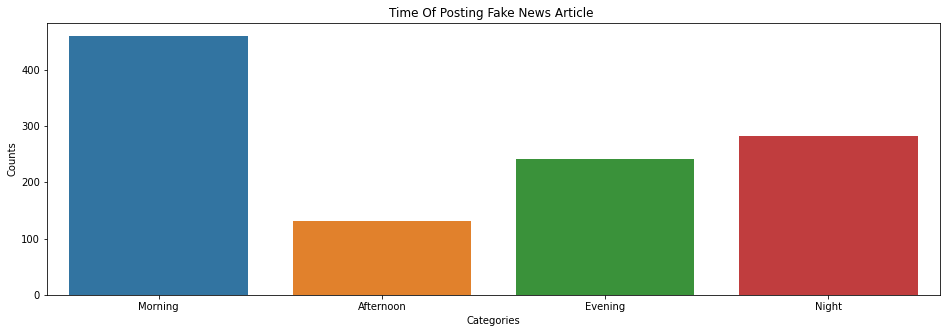

In [ ]:
# Plot the bar chart
plt.figure(figsize=(16,5))
sns.countplot(fake_df['hour_bin'])
plt.xlabel('Categories')
plt.ylabel('Counts')
plt.title('Time Of Posting Fake News Article ')
plt.show()

Majority of the fake news articles are published in the morning hours

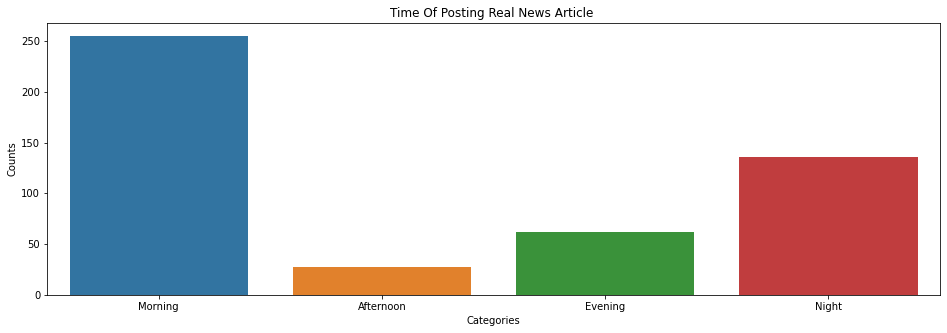

In [ ]:
# Plot the bar chart
plt.figure(figsize=(16,5))
sns.countplot(real_df['hour_bin'])
plt.xlabel('Categories')
plt.ylabel('Counts')
plt.title('Time Of Posting Real News Article ')
plt.show()

This is very simiar to the fake news time of publishing - there is no difference. Time of publishing does not play any role in determining fake news.

## Preparing Data For Machine Learning Model

Combining Feature

Here, the source of the news (site URL) is combined with the news article (text) they generate. The combined corpus will be used to create vectors that will be utilized for training machine learning algorithms.

In [30]:
train_df['source'] = train_df["site_url"].astype(str) +" "+ train_df["text_without_stopwords"]
train_df[['text','site_url','source']].head()

,text,site_url,source
0,print they should pay all the back all the mon...,100percentfedup.com,100percentfedup.com print pay back money plus ...
1,why did attorney general loretta lynch plead t...,100percentfedup.com,100percentfedup.com attorney general loretta l...
2,red state \nfox news sunday reported this mor...,100percentfedup.com,100percentfedup.com red state fox news sunday ...
3,email kayla mueller was a prisoner and torture...,100percentfedup.com,100percentfedup.com email kayla mueller prison...
4,email healthcare reform to make america great ...,100percentfedup.com,100percentfedup.com email healthcare reform ma...


In [80]:
test_df['source'] = test_df["site_url"].astype(str) +" "+ test_df["text_without_stopwords"]
test_df[['text','site_url','source']].head()              

,text,site_url,source
0,print they should pay all the back all the mon...,100percentfedup.com,100percentfedup.com print pay back money plus ...
1,why did attorney general loretta lynch plead t...,100percentfedup.com,100percentfedup.com attorney general loretta l...
2,red state \nfox news sunday reported this mor...,100percentfedup.com,100percentfedup.com red state fox news sunday ...
3,email kayla mueller was a prisoner and torture...,100percentfedup.com,100percentfedup.com email kayla mueller prison...
4,email healthcare reform to make america great ...,100percentfedup.com,100percentfedup.com email healthcare reform ma...


In [39]:
#split into dependent and independent features
x=train_df.title
y=train_df.label                

Remove Punctuation

Punctuations are present in the dataset and should be remove because they do not provide any useful information to the model. They can be ambigous and interpreted in a different way by the model

In [31]:
def remove_punct(text):
    text  = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', '', text)
    return text

train_df['source_cleaned'] = train_df['text'].apply(lambda x: remove_punct(x))
train_df[['source','source_cleaned']].head(10)

,source,source_cleaned
0,100percentfedup.com print pay back money plus ...,print they should pay all the back all the mon...
1,100percentfedup.com attorney general loretta l...,why did attorney general loretta lynch plead t...
2,100percentfedup.com red state fox news sunday ...,red state \nfox news sunday reported this mor...
3,100percentfedup.com email kayla mueller prison...,email kayla mueller was a prisoner and torture...
4,100percentfedup.com email healthcare reform ma...,email healthcare reform to make america great ...
5,100percentfedup.com print hillary goes absolut...,print hillary goes absolutely berserk she expl...
6,100percentfedup.com breaking nypd ready make a...,breaking nypd ready to make arrests in weiner ...
7,100percentfedup.com breaking nypd ready make a...,breaking nypd ready to make arrests in weiner ...
8,100percentfedup.com limbaugh said revelations ...,limbaugh said that the revelations in the wiki...
9,100percentfedup.com email people sick evil sto...,email \nthese people are sick and evil they wi...


In [81]:
test_df['source_cleaned'] = test_df['text'].apply(lambda x: remove_punct(x))
test_df[['source','source_cleaned']].head(10)

,source,source_cleaned
0,100percentfedup.com print pay back money plus ...,print they should pay all the back all the mon...
1,100percentfedup.com attorney general loretta l...,why did attorney general loretta lynch plead t...
2,100percentfedup.com red state fox news sunday ...,red state \nfox news sunday reported this mor...
3,100percentfedup.com email kayla mueller prison...,email kayla mueller was a prisoner and torture...
4,100percentfedup.com email healthcare reform ma...,email healthcare reform to make america great ...
5,100percentfedup.com print hillary goes absolut...,print hillary goes absolutely berserk she expl...
6,100percentfedup.com breaking nypd ready make a...,breaking nypd ready to make arrests in weiner ...
7,100percentfedup.com breaking nypd ready make a...,breaking nypd ready to make arrests in weiner ...
8,100percentfedup.com limbaugh said revelations ...,limbaugh said that the revelations in the wiki...
9,100percentfedup.com email people sick evil sto...,email \nthese people are sick and evil they wi...


Tokenization

Tokenization is a preprocessing step used to split paragraph or sentences into units of understandable parts. It is a foundamental step in NLP where text are splitted into smaller pieces or tokens that can be analyzed or processed by a machine. The function called 'tokenization' below is used for tokenization, it takes in a string of words and tokenizes it by splitting the string into a list of individual tokens. It also uses the lower() method to convert the string into lowercase letters. It is then used to create the 'tokenized_source' column

In [32]:
def tokenization(text):
    text = re.split('\W+', text)
    return text

train_df['tokenized_source'] = train_df['source_cleaned'].apply(lambda x: tokenization(x.lower()))
train_df[['source','source_cleaned','tokenized_source']].head(5)

,source,source_cleaned,tokenized_source
0,100percentfedup.com print pay back money plus ...,print they should pay all the back all the mon...,"[print, they, should, pay, all, the, back, all..."
1,100percentfedup.com attorney general loretta l...,why did attorney general loretta lynch plead t...,"[why, did, attorney, general, loretta, lynch, ..."
2,100percentfedup.com red state fox news sunday ...,red state \nfox news sunday reported this mor...,"[red, state, fox, news, sunday, reported, this..."
3,100percentfedup.com email kayla mueller prison...,email kayla mueller was a prisoner and torture...,"[email, kayla, mueller, was, a, prisoner, and,..."
4,100percentfedup.com email healthcare reform ma...,email healthcare reform to make america great ...,"[email, healthcare, reform, to, make, america,..."


In [82]:
test_df['tokenized_source'] = test_df['source_cleaned'].apply(lambda x: tokenization(x.lower()))
test_df[['source','source_cleaned','tokenized_source']].head(5)

,source,source_cleaned,tokenized_source
0,100percentfedup.com print pay back money plus ...,print they should pay all the back all the mon...,"[print, they, should, pay, all, the, back, all..."
1,100percentfedup.com attorney general loretta l...,why did attorney general loretta lynch plead t...,"[why, did, attorney, general, loretta, lynch, ..."
2,100percentfedup.com red state fox news sunday ...,red state \nfox news sunday reported this mor...,"[red, state, fox, news, sunday, reported, this..."
3,100percentfedup.com email kayla mueller prison...,email kayla mueller was a prisoner and torture...,"[email, kayla, mueller, was, a, prisoner, and,..."
4,100percentfedup.com email healthcare reform ma...,email healthcare reform to make america great ...,"[email, healthcare, reform, to, make, america,..."


Stemming

Stemming is the process of reducing inflected words to their root, base or stem form. This stem may not have any dictionary meaning. It is created by removing prefixes or suffixes attached to words.

The code below is used for stemming. The function 'stemming' takes in a list of tokenized words and applies Porter Stermer to each token. The Porter Stemmer is an algorithm that uses heuristics to remove suffixes from inflected words. The function is then used to create a new column called 'stem_source'

In [33]:
ps = nltk.PorterStemmer()

def stemming(text):
    text = [ps.stem(word) for word in text]
    return text

train_df['stem_source'] = train_df['tokenized_source'].apply(lambda x: stemming(x))
train_df[['source','source_cleaned','tokenized_source','stem_source']].head(5)

,source,source_cleaned,tokenized_source,stem_source
0,100percentfedup.com print pay back money plus ...,print they should pay all the back all the mon...,"[print, they, should, pay, all, the, back, all...","[print, they, should, pay, all, the, back, all..."
1,100percentfedup.com attorney general loretta l...,why did attorney general loretta lynch plead t...,"[why, did, attorney, general, loretta, lynch, ...","[whi, did, attorney, gener, loretta, lynch, pl..."
2,100percentfedup.com red state fox news sunday ...,red state \nfox news sunday reported this mor...,"[red, state, fox, news, sunday, reported, this...","[red, state, fox, news, sunday, report, thi, m..."
3,100percentfedup.com email kayla mueller prison...,email kayla mueller was a prisoner and torture...,"[email, kayla, mueller, was, a, prisoner, and,...","[email, kayla, mueller, wa, a, prison, and, to..."
4,100percentfedup.com email healthcare reform ma...,email healthcare reform to make america great ...,"[email, healthcare, reform, to, make, america,...","[email, healthcar, reform, to, make, america, ..."


In [83]:
test_df['stem_source'] = test_df['tokenized_source'].apply(lambda x: stemming(x))
test_df[['source','source_cleaned','tokenized_source','stem_source']].head(5)

,source,source_cleaned,tokenized_source,stem_source
0,100percentfedup.com print pay back money plus ...,print they should pay all the back all the mon...,"[print, they, should, pay, all, the, back, all...","[print, they, should, pay, all, the, back, all..."
1,100percentfedup.com attorney general loretta l...,why did attorney general loretta lynch plead t...,"[why, did, attorney, general, loretta, lynch, ...","[whi, did, attorney, gener, loretta, lynch, pl..."
2,100percentfedup.com red state fox news sunday ...,red state \nfox news sunday reported this mor...,"[red, state, fox, news, sunday, reported, this...","[red, state, fox, news, sunday, report, thi, m..."
3,100percentfedup.com email kayla mueller prison...,email kayla mueller was a prisoner and torture...,"[email, kayla, mueller, was, a, prisoner, and,...","[email, kayla, mueller, wa, a, prison, and, to..."
4,100percentfedup.com email healthcare reform ma...,email healthcare reform to make america great ...,"[email, healthcare, reform, to, make, america,...","[email, healthcar, reform, to, make, america, ..."


Feature Encoding

The target feature has 2 unique values: Fake and Real. The values of this feature are categorical and needs to be converted into numeric values. This is because machine leerning algorithm doesn't understand text. The code below help convert Fake and Real to 0 and 1 respectively.

In [34]:
train_df.loc[train_df['label'] == 'Real', 'label'] = 1
train_df.loc[train_df['label'] == 'Fake', 'label'] = 0
train_df[['source','label']].head(5)

,source,label
0,100percentfedup.com print pay back money plus ...,1
1,100percentfedup.com attorney general loretta l...,1
2,100percentfedup.com red state fox news sunday ...,1
3,100percentfedup.com email kayla mueller prison...,1
4,100percentfedup.com email healthcare reform ma...,1


Converitng to string

The function below takes a list of words as input and convert them to a string. The '.join' method of the str class is used by the function to concatenate the list of stemmed words into a string using space character as the separator. It removes the square bracket from the columns.

In [35]:
def convert_tokens_to_string(stemmed):
   return ' '.join(stemmed)

In [36]:
train_df['stem_source'] = train_df['stem_source'].apply(convert_tokens_to_string)
# X_val_df['stem_source'] = X_val_df['stem_source'].apply(convert_tokens_to_string)
train_df[['source','stem_source']].head(5)
# X_val_df.head(5)

,source,stem_source
0,100percentfedup.com print pay back money plus ...,print they should pay all the back all the mon...
1,100percentfedup.com attorney general loretta l...,whi did attorney gener loretta lynch plead the...
2,100percentfedup.com red state fox news sunday ...,red state fox news sunday report thi morn that...
3,100percentfedup.com email kayla mueller prison...,email kayla mueller wa a prison and tortur by ...
4,100percentfedup.com email healthcare reform ma...,email healthcar reform to make america great a...


In [84]:
test_df['stem_source'] = test_df['stem_source'].apply(convert_tokens_to_string)
test_df[['source','stem_source']].head(5)

,source,stem_source
0,100percentfedup.com print pay back money plus ...,print they should pay all the back all the mon...
1,100percentfedup.com attorney general loretta l...,whi did attorney gener loretta lynch plead the...
2,100percentfedup.com red state fox news sunday ...,red state fox news sunday report thi morn that...
3,100percentfedup.com email kayla mueller prison...,email kayla mueller wa a prison and tortur by ...
4,100percentfedup.com email healthcare reform ma...,email healthcar reform to make america great a...


Vectorization

Vectorization is the process of transforming a piece of text into a numerical vector. It is the process of mapping a word in a text to a numerical index and representing the text as the vector of the indexes. There are different types of vectorization techniques, and they are Bag of words(BOW), Term Frequency Inverse Document Frequency(TFIDF), word embedding etc

My choice is TFIDF because of the following:

!) It is simple to implement

2) It takes into acount the popularity of a word is in a text

3) It is better than BOW because it takes into consideration the importance of every word in the text

The code below is used for vectorization.

In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_v=TfidfVectorizer(max_features=5000,ngram_range=(1,3))
tfidf_v
x=tfidf_v.fit_transform(train_df['stem_source']).toarray()

In [85]:
test=tfidf_v.fit_transform(test_df['stem_source']).toarray()

In [38]:
# y = train_df['label']
# y_train = y.astype('int')

### Handling Imbalanced Dataset

### Why I chose to perform oversampling

Given the limited size of the dataset, the application of undersampling as a solution may not be feasible. It is important to take into consideration the size and distribution of the data when deciding on an appropriate sampling method, as undersampling can potentially result in loss of information and decreased model performance. This is why I used oversampling.

In [39]:
from imblearn.over_sampling import SMOTE
smk = SMOTE(random_state=42)
x,y_train=smk.fit_resample(x,y_train)

In [75]:
x.shape, y_train.shape

((2232, 5000), (2232,))

Before Oversampling

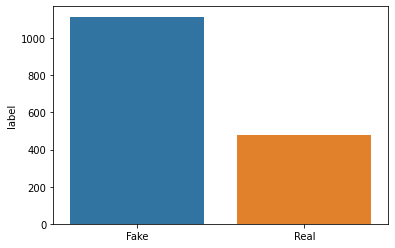

In [117]:
sns.barplot(x=train_df['label'].value_counts().index, y=train_df['label'].value_counts())
plt.show()

After Oversampling

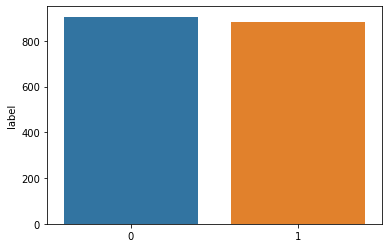

In [114]:
sns.barplot(x=y_train.value_counts().index, y=y_train.value_counts())
plt.show()

### Data Splitting Or Segregation

Data segregation is simply the splitting of data into training and validation or test sets. It is accomplished by using 'train_test_split' imported from sklearn library.

In [40]:
from sklearn.model_selection import train_test_split
X_train_df, X_val_df, y_train, y_val = train_test_split(x, 
                                                  y_train, 
                                                  test_size=0.2, 
                                                  random_state=20)

In [77]:
X_train_df.shape,  X_val_df.shape 

((1785, 5000), (447, 5000))

Convert the target feature from object type to integer

In [41]:
y_train = y_train.astype('int')
y_val = y_val.astype('int')


**MODEL TRAINING USING MACHINE LEARNING ALGORITHMS**

**What is machine learning algorithm?**

Machine learning algorithm is a set of statistical models and computational methods that allow a computer to improve its performance at a task with experience. They learn from data, either to make predictions or to find patterns. Examples of algorithms used for this project are Naive Bayes, Adaboost and Passive Aggressive algorithm.

**Criteria Used For Model Evaluation**

Accuracy: Accuracy is a metric in machine learning used to evaluate the performance of a model. It represents the proportion of correct predictions made by the model over the total number of predictions. Accuracy is a commonly used metric in classification tasks, but it may not always be the best measure of model performance, as it does not take into account false positives or false negatives.

Recall: It's a metric in classification problems that quantifies the number of true positive predictions made by the model over the number of positive instances present in the data. It measures the model's ability to find all relevant cases.

Precision: It's a metric in classification problems that quantifies the number of true positive predictions made by the model over the number of positive predictions made. It measures the model's ability to correctly predict positive instances.

AUC-ROC: It's a commonly used evaluation metric in binary classification problems that measures the model's ability to distinguish between positive and negative classes. The acronym stands for "Area Under the Receiver Operating Characteristic Curve." The ROC curve plots the true positive rate against the false positive rate, and the AUC is the area under this curve. AUC-ROC ranges from 0 to 1, with a higher value indicating better performance.


**In this project, accuracy is the superior metric because the inbalance of the dataset has been handled, but recall and precision will be used for additional information **

In [42]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import GridSearchCV

**ADABOOST MACHINE LEARNING ALGORITHM**

In [43]:
Adab = AdaBoostClassifier(DecisionTreeClassifier(max_depth=500),n_estimators=20,random_state=1)
Adab.fit(X_train_df, y_train)
y_pred_a = Adab.predict(X_val_df)
# Ad = metrics.accuracy_score(y_val,y_pred3)
# print("accuracy: %0.3f" %ABscore)

**Baseline Performance of Adaboost**

In [44]:
from sklearn.metrics import accuracy_score, recall_score, precision_score

print('baseline accuracy is;',round(accuracy_score(y_pred_a, y_val),2)*100,'%')
print('baseline recall:',round(recall_score(y_pred_a, y_val),2)*100,'%')
print('baseline precision:',round(precision_score(y_pred_a, y_val),2)*100,'%')

baseline accuracy is; 85.0 %
baseline recall: 86.0 %
baseline precision: 86.0 %


Confusion Matrix and classification Report

              precision    recall  f1-score   support

           0       0.83      0.94      0.88       211
           1       0.94      0.83      0.88       236

    accuracy                           0.88       447
   macro avg       0.88      0.88      0.88       447
weighted avg       0.89      0.88      0.88       447



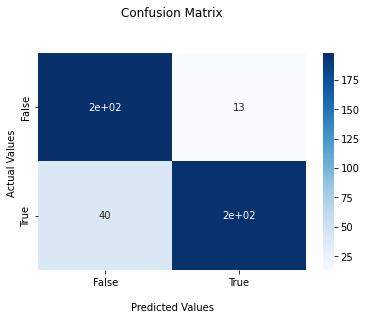

In [118]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Calculate the confusion matrix
cm = confusion_matrix(y_val, y_pred_a)

# Plot the confusion matrix using seaborn heatmap
ax = sns.heatmap(cm, annot=True, cmap='Blues')
ax.set_title('Confusion Matrix\n\n')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ')

# Set tick labels for x and y axis
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

# Calculate the classification report
cr = classification_report(y_val, y_pred_a)
print(cr)

# Show the plot
plt.show()

This model has an accuracy of 85%, meaning that it correctly predicts 85 instances out of every 100. It also has 33 false negatives and 34 false positives, resulting in a failure to correctly predict 67 instances. Overall, while not bad, a better model is needed. Hyperparameter optimization will be employed to enhance the model's performance

## **NAIVE BAYES**

In [46]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

clf = GaussianNB()

# Train the classifier on the training data
clf.fit(X_train_df, y_train)

# Make predictions on the validation data
pred_n = clf.predict(X_val_df)
ABscore = metrics.accuracy_score(y_val,pred_n)
print("accuracy: %0.3f" %ABscore)

accuracy: 0.861


**Baseline performance of Naive Bayes**

              precision    recall  f1-score   support

           0       0.91      0.84      0.88       211
           1       0.87      0.93      0.90       236

    accuracy                           0.89       447
   macro avg       0.89      0.89      0.89       447
weighted avg       0.89      0.89      0.89       447



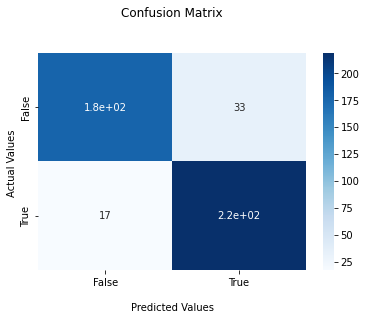

In [119]:
# Calculate the confusion matrix
cm = confusion_matrix(y_val, pred_n)

# Plot the confusion matrix using seaborn heatmap
ax = sns.heatmap(cm, annot=True, cmap='Blues')
ax.set_title('Confusion Matrix\n\n')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ')

# Set tick labels for x and y axis
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

# Calculate the classification report
cr = classification_report(y_val, pred_n)
print(cr)

# Show the plot
plt.show()

This Naive Bayes model has a higher accuracy compared to the Adaboost algorithm. It also has a lower number of false negatives (13), but a higher number of false positives (49). The parameters of this model will be tuned to improve it's performance.

### **PASSIVE AGGRESSIVE ALGORITHM**

In [121]:
clf = PassiveAggressiveClassifier(max_iter=1000, random_state=0,tol=1e-3)
clf.fit(X_train_df, y_train)
pred_ = clf.predict(X_val_df)
ABscore = metrics.accuracy_score(y_val,pred_)
print("accuracy: %0.3f" %ABscore)

accuracy: 0.911


**Baseline Performance of Passive Aggressive Algorithm**

              precision    recall  f1-score   support

           0       0.89      0.92      0.91       211
           1       0.93      0.90      0.91       236

    accuracy                           0.91       447
   macro avg       0.91      0.91      0.91       447
weighted avg       0.91      0.91      0.91       447



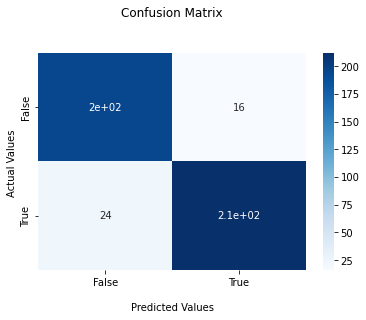

In [122]:
# Calculate the confusion matrix
cm = confusion_matrix(y_val, pred_)

# Plot the confusion matrix using seaborn heatmap
ax = sns.heatmap(cm, annot=True, cmap='Blues')
ax.set_title('Confusion Matrix\n\n')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ')

# Set tick labels for x and y axis
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

# Calculate the classification report
cr = classification_report(y_val, pred_)
print(cr)

# Show the plot
plt.show()

This is the best baseline model of the three, with an accuracy of 91%. It has 16 false positives and 24 false negatives, resulting in a total failure to correctly predict 40 instances

**Adaboost Hyperparameter Optimization**

In [98]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

In [102]:
# defining the classifier
model = AdaBoostClassifier()
# creating a dic for the grid
grid = dict()
# estimator till 500
grid['n_estimators'] = [10, 50, 100, 200, 500]
# defining learning rate
grid['learning_rate'] = [0.0001, 0.01, 0.1, 1.0, 1.1, 1.2]
# defining the CV
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3)
# initializing the grid search
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy')
# training the model on grid search for hyperparameter tuning of Adaboost
grid_result = grid_search.fit(X_train_df, y_train)
# finding the best results /hyperparameter tuning of Adaboost
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.861627 using {'learning_rate': 0.1, 'n_estimators': 500}


In [103]:
model = AdaBoostClassifier(learning_rate = 0.1, n_estimators = 500)
model.fit(X_train_df, y_train)
y_pred_a = model.predict(X_val_df)
# ABscore = metrics.accuracy_score(y_val,y_pred_a)
# print("accuracy: %0.3f" %ABscore)

**Performance of Adaboost After Hyperparameter Optimization**

In [104]:
print('baseline accuracy is;',round(accuracy_score(y_pred_a, y_val),2)*100,'%')
print('baseline recall:',round(recall_score(y_pred_a, y_val),2)*100,'%')
print('baseline precision:',round(precision_score(y_pred_a, y_val),2)*100,'%')

baseline accuracy is; 88.0 %
baseline recall: 94.0 %
baseline precision: 83.0 %


              precision    recall  f1-score   support

           0       0.83      0.94      0.88       211
           1       0.94      0.83      0.88       236

    accuracy                           0.88       447
   macro avg       0.88      0.88      0.88       447
weighted avg       0.89      0.88      0.88       447



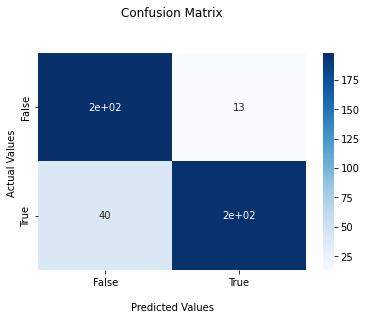

In [123]:
# Calculate the confusion matrix
cm = confusion_matrix(y_val, y_pred_a)

# Plot the confusion matrix using seaborn heatmap
ax = sns.heatmap(cm, annot=True, cmap='Blues')
ax.set_title('Confusion Matrix\n\n')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ')

# Set tick labels for x and y axis
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

# Calculate the classification report
cr = classification_report(y_val, y_pred_a)
print(cr)

# Show the plot
plt.show()

The efficacy of the model has been enhanced with an increase in accuracy from 85% to 88%. Additionally, there has been a significant reduction in the number of false positives, which went from 34 to 13.

**Hyperparameter Optimization Of Naive Bayes**

In [94]:
# Import the GridsearchCv
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV, train_test_split


# Define the hyperparameters to be optimized
param_grid = {'var_smoothing': [1e-10, 1e-9, 1e-8, 1e-7, 1e-6,1e-5,1e-4,1e-3]}

# Create an instance of the classifier
clf = GaussianNB()

# Use GridSearchCV to perform hyperparameter optimization
grid_search = GridSearchCV(clf, param_grid, cv=5)
grid_search.fit(X_train_df, y_train)

# Print the best hyperparameters found
print("Best: %f using %s" % (grid_search.best_score_, grid_search.best_params_))


# Make predictions on the validation data using the optimized model


Best: 0.861064 using {'var_smoothing': 1e-05}


In [106]:
clf = GaussianNB(var_smoothing = 1e-05)

# Train the classifier on the training data
clf.fit(X_train_df, y_train)

# Make predictions on the validation data
pred_n = clf.predict(X_val_df)
ABscore = metrics.accuracy_score(y_val,pred_n)
print("accuracy: %0.3f" %ABscore)

accuracy: 0.888


**Performance of Naive Bayes After Hyperparameter optimization**

In [108]:
print('baseline accuracy is;',round(accuracy_score(pred_n, y_val),2)*100,'%')
print('baseline recall:',round(recall_score(pred_n, y_val),2)*100,'%')
print('baseline precision:',round(precision_score(pred_n, y_val),2)*100,'%')

baseline accuracy is; 89.0 %
baseline recall: 87.0 %
baseline precision: 93.0 %


              precision    recall  f1-score   support

           0       0.91      0.84      0.88       211
           1       0.87      0.93      0.90       236

    accuracy                           0.89       447
   macro avg       0.89      0.89      0.89       447
weighted avg       0.89      0.89      0.89       447



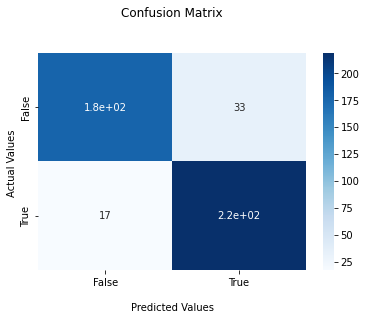

In [124]:
# Calculate the confusion matrix
cm = confusion_matrix(y_val, pred_n)

# Plot the confusion matrix using seaborn heatmap
ax = sns.heatmap(cm, annot=True, cmap='Blues')
ax.set_title('Confusion Matrix\n\n')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ')

# Set tick labels for x and y axis
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

# Calculate the classification report
cr = classification_report(y_val, pred_n)
print(cr)

# Show the plot
plt.show()

The performance of Naive Bayes remained the same before and after optimization

**Hyperparameter Optimization Of Passive Aggressive Algorithm**

In [108]:
model = PassiveAggressiveClassifier()
# creating a dic for the grid
grid = dict()
# estimator till 500
grid['C'] = [0.1,1,10, 50]
# defining learning rate
grid['max_iter'] = [500,1000,1500,2000]

grid['tol'] = [0.001,0.0001,0.01,0.1]
# defining the CV
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3)
# initializing the grid search
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy')
# training the model on grid search for hyperparameter tuning of Adaboost
grid_result = grid_search.fit(X_train_df, y_train)
# finding the best results /hyperparameter tuning of Adaboost
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.915415 using {'C': 0.1, 'max_iter': 500, 'tol': 0.001}


In [56]:
clf = PassiveAggressiveClassifier(max_iter=500, random_state=0,tol=1e-4,C=0.1)
clf.fit(X_train_df, y_train)
pred_ = clf.predict(X_val_df)
# ABscore = metrics.accuracy_score(y_val,pred_)
# print("accuracy: %0.3f" %ABscore)

**Performance After Hyperparameter Optimization of Passive Aggressive Algorithm**

In [57]:
print('accuracy is;',round(accuracy_score(pred_, y_val),2)*100,'%')
print('recall:',round(recall_score(pred_, y_val),2)*100,'%')
print('precision:',round(precision_score(pred_, y_val),2)*100,'%')

accuracy is; 92.0 %
recall: 93.0 %
precision: 92.0 %


              precision    recall  f1-score   support

           0       0.89      0.92      0.91       211
           1       0.93      0.90      0.91       236

    accuracy                           0.91       447
   macro avg       0.91      0.91      0.91       447
weighted avg       0.91      0.91      0.91       447



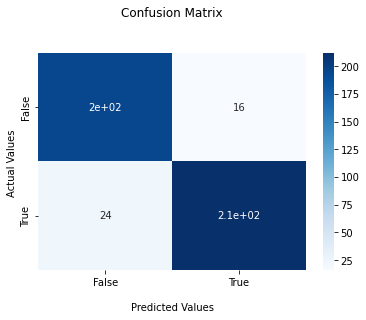

In [125]:
# Calculate the confusion matrix
cm = confusion_matrix(y_val, pred_)

# Plot the confusion matrix using seaborn heatmap
ax = sns.heatmap(cm, annot=True, cmap='Blues')
ax.set_title('Confusion Matrix\n\n')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ')

# Set tick labels for x and y axis
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

# Calculate the classification report
cr = classification_report(y_val, pred_)
print(cr)

# Show the plot
plt.show()

This is a significantly improved model. Hyperparameter tuning has increased the accuracy of the model from 91% to 92%, and reduced the number of false positives from 24 to 17. As a result, the tuned model recorded a recall and precision of 92% and 92%, respectively.

## CHOOSING THE BEST MODEL

The best model of the three is passive aggressive classifier because it outperforms the rest of the algorithm in every metric. It will be used for predicting the label of the test dataset.

## PREDICTING THE LABEL OF TEST DATASET

In [86]:
pred_ = clf.predict(test)

In [95]:
test_df['predicted_value'] = pred_
test_df[['stem_source','predicted_value']].head(2)

,stem_source,predicted_value
0,print they should pay all the back all the mon...,1
1,whi did attorney gener loretta lynch plead the...,1


Saving predicted values to csv file

In [96]:
test_df['predicted_value'].to_csv('test_prediction.csv', index=False)

## RECOMMENDATION

Deep learning Models like the ones listed below can also be used for the prediction, but due to time constraints I'm not able to experiment with them.
1. LSTM (Long Short-Term Memory)
2. BERT (Bidirectional Encoder Representations from Transformers)
3. ANN(artificial neural network)

# **CONCLUSION**

The project aimed to predict the authenticity of news articles using the source of the articles. Basic data cleaning was performed on the dataset and exploratory data analysis techniques were used to explore the data for insights. Various language models, such as unigram, bigram, and trigram, were used to plot word clouds of the most common words in the news articles. A new feature was created by combining the 'text without stopwords' and 'site_url' together, and this feature was preprocessed by performing tokenization, stemming, and punctuation removal. The stemmed source text was converted into vectors using the TFIDF (Term Frequency Inverse Document Frequency) vectorizer. The vectors were passed into machine learning models: Adaboost, Naive Bayes, and Passive Aggressive Algorithm to make predictions, but there were many false positives and false negatives, indicating an imbalanced dataset. The imbalanced target variable was handled using oversampling, and the performance of the models was improved. Adaboost recorded a baseline accuracy of 85%, Naive Bayes 86%, and Passive Aggressive Algorithm 91%. The performance of the Passive Aggressive classifier and Adaboost model was improved after hyperparameter optimization, but Naive Bayes remained the same. The final model used for predicting the test dataset was the Passive Aggressive Algorithm. Data preprocessing and hyperparameter optimization were crucial in improving the accuracy of these models. Other models such as LSTM and BERT could also be used, but due to time constraints, these models were not used in this study